## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
boston = datasets.load_boston()


In [6]:
X= boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1)
lasso = linear_model.Lasso(alpha = 1.0)
ridge = linear_model.Ridge(alpha = 1.0)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'Lasso MSE: {mean_squared_error(y_test,y_pred)}')
y_pred = ridge.predict(X_test)
print(f'Ridge MSE: {mean_squared_error(y_test,y_pred)}')


Lasso MSE: 35.75973517500588
Ridge MSE: 36.07509208896773


In [8]:
lasso.coef_

array([-0.07034499,  0.0417824 , -0.        ,  0.        , -0.        ,
        1.37433885,  0.01432351, -0.60338718,  0.27316542, -0.01553885,
       -0.72929686,  0.00994312, -0.70501788])

In [20]:
lasso_coef = []
ridge_coef = []
lasso_errors = []
ridge_errors = []
alpha = np.linspace(0,1,20)
for a in alpha:
    lasso = linear_model.Lasso(alpha=a)
    ridge = linear_model.Ridge(alpha=a)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    lasso_coef.append(lasso.coef_)
    ridge_coef.append(ridge.coef_)
    lasso_errors.append(mean_squared_error(y_test,lasso.predict(X_test)))
    ridge_errors.append(mean_squared_error(y_test,ridge.predict(X_test)))

C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [21]:
lasso_coef

[array([-1.11362665e-01,  3.90784349e-02,  4.68530543e-03,  2.32020084e+00,
        -1.54669001e+01,  4.28704428e+00, -9.00526977e-03, -1.39213671e+00,
         2.92739135e-01, -1.19444327e-02, -9.52845014e-01,  1.07999203e-02,
        -4.66199901e-01]),
 array([-0.10363395,  0.04022873, -0.0561102 ,  1.32885647, -0.        ,
         4.32306062, -0.02075489, -1.13582166,  0.26721428, -0.01378453,
        -0.7838783 ,  0.01166485, -0.49276637]),
 array([-0.10327041,  0.04033619, -0.04714289,  0.47427269, -0.        ,
         4.16093827, -0.01775303, -1.10776236,  0.27511345, -0.01432859,
        -0.79219114,  0.01168138, -0.50799172]),
 array([-0.1021758 ,  0.04046068, -0.04106121,  0.        , -0.        ,
         3.99669116, -0.01507145, -1.07773259,  0.27938874, -0.01465962,
        -0.79491237,  0.01164171, -0.52184291]),
 array([-0.10016976,  0.04060648, -0.03857702,  0.        , -0.        ,
         3.82979269, -0.01278922, -1.04524337,  0.27914887, -0.0147252 ,
        -0.790

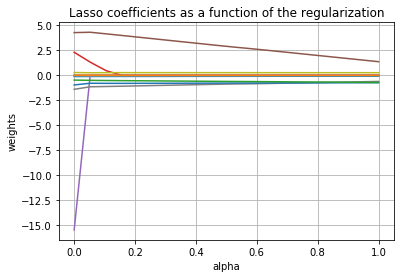

In [22]:
# 获得绘图句柄
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alpha, lasso_coef)
# ax.set_xscale('log')    #x轴使用对数表示
# ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()


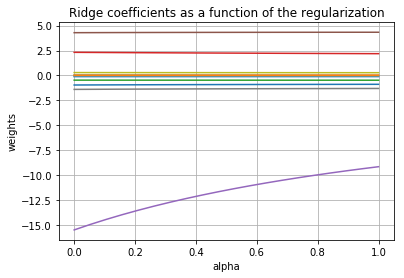

In [23]:
ax = plt.gca()
# 参数中每一个维度使用一个颜色表示
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k'])

# 绘制alpha和对应的参数之间的关系图
ax.plot(alpha, ridge_coef)
# ax.set_xscale('log')    #x轴使用对数表示
# ax.set_xlim(ax.get_xlim()[::-1])  # 将x轴反转，便于显示
plt.grid()
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

In [24]:
lasso_errors

[35.10214864237954,
 37.9099814554544,
 38.05348017938227,
 38.03831054898416,
 37.7124312142603,
 37.410313724823524,
 37.13187258354235,
 36.877190321609135,
 36.646187042074736,
 36.438941842242066,
 36.28085374510889,
 36.18078628188152,
 36.072535378699115,
 35.96021469214742,
 35.87017628621965,
 35.802417521708946,
 35.75694000988337,
 35.73377536867157,
 35.73285575908822,
 35.75973517500588]

In [25]:
ridge_errors

[35.10214864237951,
 35.18128175910997,
 35.255920378012824,
 35.32640296664842,
 35.39303789201726,
 35.45610611617885,
 35.515863747827254,
 35.57254441183045,
 35.626361422125086,
 35.67750975740008,
 35.7261678471234,
 35.77249917985672,
 35.81665374786045,
 35.85876934261604,
 35.89897271565967,
 35.93738061839936,
 35.974100733611934,
 36.009232510230895,
 36.04286791193362,
 36.07509208896773]